# Example: Satellite Types

Last Verified to Run: 2023-10-20\
Verified Stack Release: w_2023_42

## Introduction

The purpose of this notebook is to demonstrate the usage of the different satellite models implemented by the LEOSim module to create realistic surface brightness profiles of Low-Earth orbit satellites. This involves the creation of the satellite profiles and the calculation of stationary surface brightness profiles for a number of different satellite geometries. For a in-depth demonstration of the methodology used to calculate the surface brightness profiles, see `Example_SatelliteMethodology.ipynb`.

In [1]:
# This should match the verified version listed at the start of the notebook
! eups list -s lsst_distrib

   g4213664e8e+a91833641f 	w_latest current w_2023_42 setup


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm
import numpy as np
import astropy.units as u
import galsim

from leosim import DiskSatellite, RectangularSatellite, Instrument

All the examples in this notebook will share the same instrument definition meant to represent the LSST Camera. The atmosphere PSF is represented by a Kolmogorov profile with full-width-half-maximum of 0.67 arcseconds. Finally, we define a scale, consisting of 1000 steps of 0.02 arcsecond width, that will be used to create the profile images.

In [3]:
## Define an instrument
outer_radius = 4.18*u.m
inner_radius = 2.558*u.m
pixel_scale = 0.2*u.arcsec/u.pix

instrument = Instrument(outer_radius, inner_radius, pixel_scale)

## Define an atmosphere
seeing_profile = galsim.Kolmogorov(fwhm=0.67)

## Define profile scales
step_size = 0.02 
steps = 1000

smin = -int(steps*step_size/2)
smax = int(steps*step_size/2)
scale = np.linspace(smin, smax, steps)

## Disk Satellite Example

The first satellite example is the `DiskSatellite` that represents a satellite whose reflective surface is shaped like a circular disk. Below we create a disk satellite with 5 meter radius, orbiting at a height of 550 kilometers, and observed at a 40 degree angle from zenith. We then create an image of the satellite profile and plot the result.

Text(0.5, 0, 'arcsec')

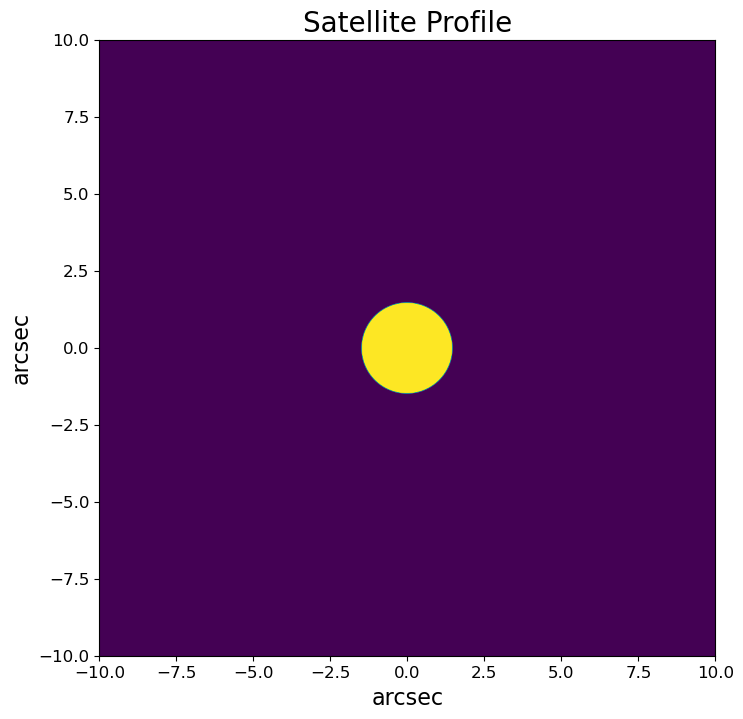

In [4]:
## Define a satellite
height = 550*u.km
zangle = 40*u.deg
radius = 5.0*u.m

satellite = DiskSatellite(height, zangle, radius)

satellite_profile = satellite.profile
satellite_image = satellite_profile.drawImage(scale=step_size, nx=steps, ny=steps)

fig, ax = plt.subplots(1, 1, figsize=(12, 8), facecolor='white')
ax.imshow(satellite_image.array, origin='lower', extent=[smin, smax, smin, smax])
ax.set_title('Satellite Profile', fontsize=20)
ax.tick_params(labelsize=12)
ax.set_ylabel('arcsec', fontsize=16)
ax.set_xlabel('arcsec', fontsize=16)

Next, we calculate the disk satellite's stationary surface brightness profile by convolving the satellite profile with the defocus kernel and atmospheric PSF.

Text(0.5, 0, 'arcsec')

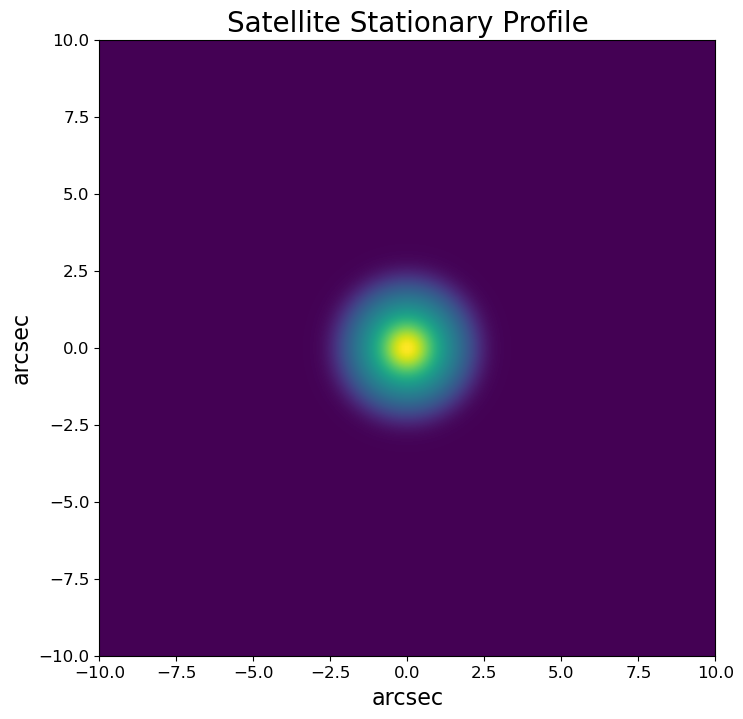

In [5]:
stationary_profile = satellite.get_stationary_profile(seeing_profile, instrument)
stationary_image = stationary_profile.drawImage(scale=step_size, nx=steps, ny=steps)

fig, ax = plt.subplots(1, 1, figsize=(12, 8), facecolor='white')
ax.imshow(stationary_image.array, origin='lower', extent=[smin, smax, smin, smax])
ax.set_title('Satellite Stationary Profile', fontsize=20)
ax.tick_params(labelsize=12)
ax.set_ylabel('arcsec', fontsize=16)
ax.set_xlabel('arcsec', fontsize=16)

## Rectangular Satellite Example

The next satellite example is the `RectangularSatellite` that represents a satellite whose reflective surface is shaped like a rectangle. Below we create a rectangular satellite with a width and length of 10 meters, orbiting at a height of 550 kilometers, and observed at a 40 degree angle from zenith. We then create an image of the satellite profile and plot the result.

Text(0.5, 0, 'arcsec')

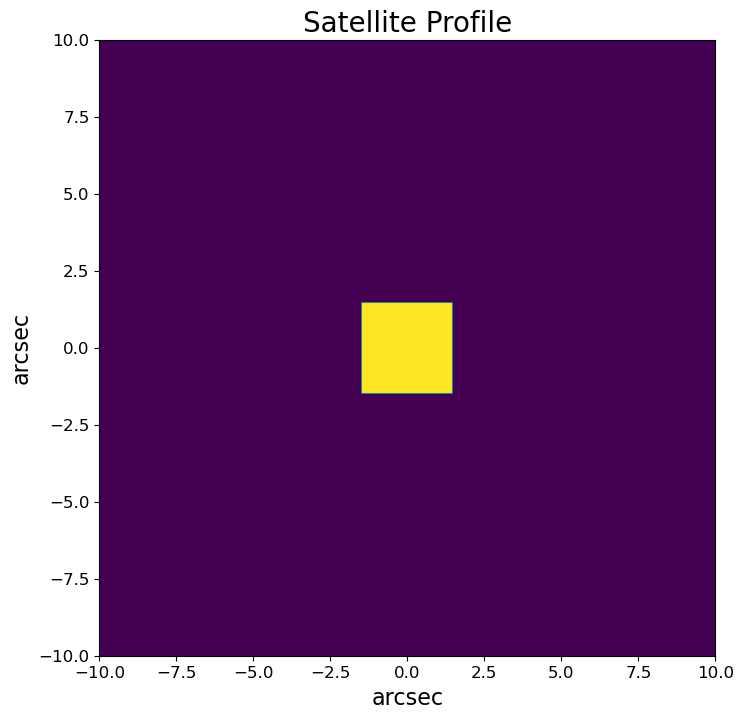

In [6]:
## Define a satellite
height = 550*u.km
zangle = 40*u.deg
length = 10.0*u.m
width = 10.0*u.m

satellite = RectangularSatellite(height, zangle, width, length)

satellite_profile = satellite.profile
satellite_image = satellite_profile.drawImage(scale=step_size, nx=steps, ny=steps)

fig, ax = plt.subplots(1, 1, figsize=(12, 8), facecolor='white')
ax.imshow(satellite_image.array, origin='lower', extent=[smin, smax, smin, smax])
ax.set_title('Satellite Profile', fontsize=20)
ax.tick_params(labelsize=12)
ax.set_ylabel('arcsec', fontsize=16)
ax.set_xlabel('arcsec', fontsize=16)

As before, we calculate the rectangular satellite's stationary surface brightness profile by convolving the satellite profile with the defocus kernel and atmospheric PSF.

Text(0.5, 0, 'arcsec')

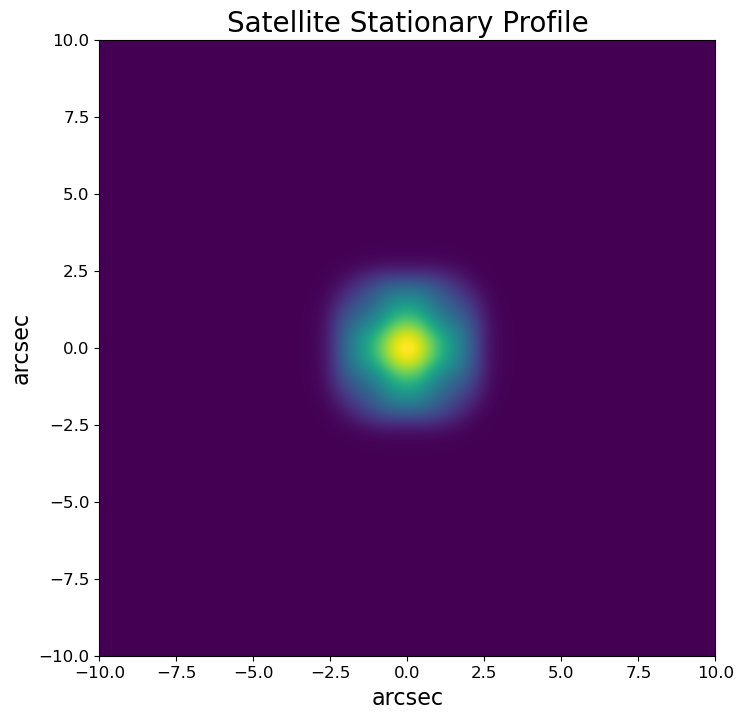

In [7]:
stationary_profile = satellite.get_stationary_profile(seeing_profile, instrument)
stationary_image = stationary_profile.drawImage(scale=step_size, nx=steps, ny=steps)

fig, ax = plt.subplots(1, 1, figsize=(12, 8), facecolor='white')
ax.imshow(stationary_image.array, origin='lower', extent=[smin, smax, smin, smax])
ax.set_title('Satellite Stationary Profile', fontsize=20)
ax.tick_params(labelsize=12)
ax.set_ylabel('arcsec', fontsize=16)
ax.set_xlabel('arcsec', fontsize=16)

## Component Satellite

The final satellite example is the `ComponentSatellite` that represents a satellite whose reflective surface can be constructed from a number of components representing the satellite bus, solar panels, and/or communication dishes. While the preceding examples represented simple geometries, this example class is meant to represent complex satellite profiles, which can also consists of components with varying brightnesses.

There are three different components, all child classes of the `Component` class:
* The `Bus` class which represents the main satellite body or bus as a rectangle. A `Bus` object is initialized using the position in x, position in y, a width, and a length, all in units of meters and represented as `astropy.units.Quantity` objects.
* The `Panel` class which represents a satellite solar panel as a rectangle. A `Panel` object is initialized using the position in x, position in y, a width, and a length, all in units of meters and represented as `astropy.units.Quantity` objects.
* The `Dish` class which represents a satellite communication dish as a circular disk. A `Dish` object is initialized using the position in x, position in y, and a radius, all in units of meters and represented as `astopy.units.Quantity` objects.

Additionally any `Component` object can be initialized with the optional `flux` parameter (default is 1.0), which can be used to scale the relative fluxes of the components. The satellite profile of the `ComponentSatellite`, is constructed by creating `galsim.GSObject` objects corresponding to each component and adding them together to create the final profile. Below we initialize a component satellite consisting of a central bus and two solar panels, positioned on either side, that is orbiting at a height of 550 kilometers, and observed at a 40 degree angle from zenith. The flux of the central bus is set to 10 times the flux of either solar panel. We then create an image of the satellite profile and plot the result.

Text(0.5, 0, 'arcsec')

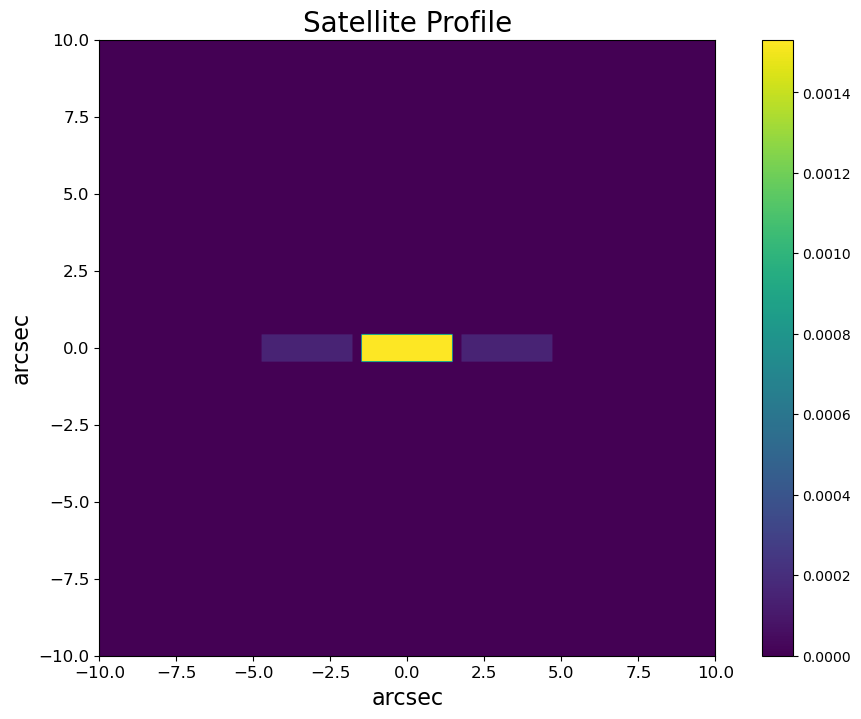

In [8]:
from leosim import ComponentSatellite, Panel, Bus, Dish

## Define a satellite bus
bus_width = 10*u.m
bus_length = 3*u.m
bus_flux = 10.

bus = Bus(0.*u.m, 0.*u.m, bus_width, bus_length, flux=bus_flux)

## Define solar panels
panel_width = 10*u.m
panel_length = 3*u.m
panel_flux = 1.

panel_1 = Panel(11*u.m, 0*u.m, panel_width, panel_length, flux=panel_flux)
panel_2 = Panel(-11*u.m, 0*u.m, panel_width, panel_length, flux=panel_flux)

## Define a Component Satellite
satellite = ComponentSatellite(height, zangle, components=[bus, panel_1, panel_2])
satellite_profile = satellite.profile
satellite_image = satellite_profile.drawImage(scale=step_size, nx=steps, ny=steps)

fig, ax = plt.subplots(1, 1, figsize=(12, 8), facecolor='white')
im = ax.imshow(satellite_image.array, origin='lower', extent=[smin, smax, smin, smax])
cbar = fig.colorbar(im)
ax.set_title('Satellite Profile', fontsize=20)
ax.tick_params(labelsize=12)
ax.set_ylabel('arcsec', fontsize=16)
ax.set_xlabel('arcsec', fontsize=16)

Finally, we calculate the component satellite's stationary surface brightness profile by convolving the satellite profile with the defocus kernel and atmospheric PSF.

Text(0.5, 0, 'arcsec')

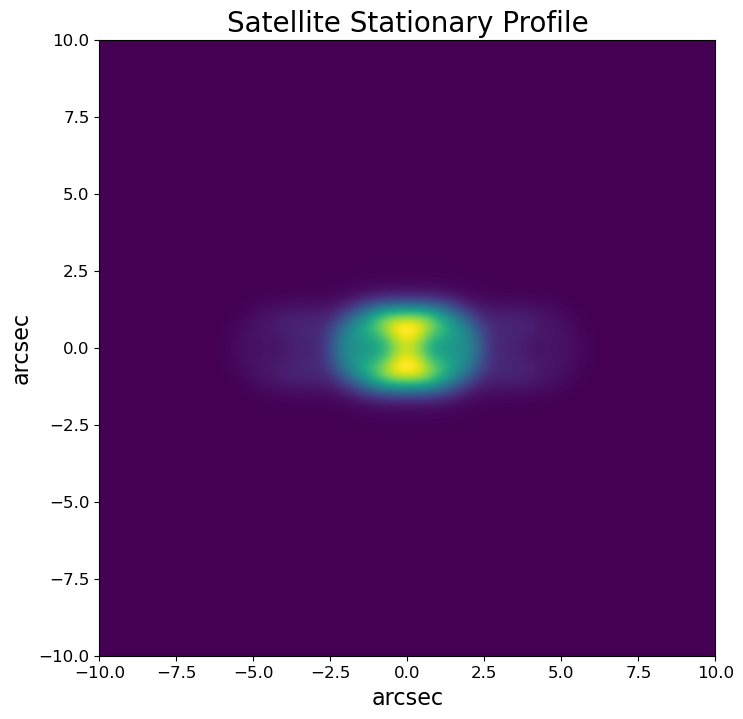

In [9]:
stationary_profile = satellite.get_stationary_profile(seeing_profile, instrument)
stationary_image = stationary_profile.drawImage(scale=step_size, nx=steps, ny=steps)

fig, ax = plt.subplots(1, 1, figsize=(12, 8), facecolor='white')
ax.imshow(stationary_image.array, origin='lower', extent=[smin, smax, smin, smax])
ax.set_title('Satellite Stationary Profile', fontsize=20)
ax.tick_params(labelsize=12)
ax.set_ylabel('arcsec', fontsize=16)
ax.set_xlabel('arcsec', fontsize=16)